# Clustering

In [1]:
from pycaret.datasets import get_data

In [17]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
df = get_data('pokemon')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
X = df.drop('Name',axis=1)
X = pd.get_dummies(X,columns=['Type 1','Type 2'])
X['Legendary'] = X['Legendary'].map({False:'0',True:'1'})

In [6]:
X

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,318,45,49,49,65,65,45,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,405,60,62,63,80,80,60,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3,525,80,82,83,100,100,80,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,625,80,100,123,122,120,80,1,0,...,0,0,0,0,0,1,0,0,0,0
4,4,309,39,52,43,60,50,65,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6,1,...,0,0,0,0,0,0,0,0,0,0
796,719,700,50,160,110,160,110,110,6,1,...,0,0,0,0,0,0,0,0,0,0
797,720,600,80,110,60,150,130,70,6,1,...,1,0,0,0,0,0,0,0,0,0
798,720,680,80,160,60,170,130,80,6,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
dados_normalizados = scaler.fit_transform(X[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]) 

# K - Means

<p> Verificando redução de variancia </p>

In [8]:
lista = []
for i in range(1,30):
    M = KMeans(n_clusters=i).fit(dados_normalizados)
    lista.append(M.inertia_)

In [9]:
lista

[141.29071659282295,
 83.86158973635612,
 69.35069800705311,
 61.42578972860004,
 56.8005080160267,
 52.91449091185811,
 50.38104229754487,
 47.122627886104674,
 45.07151789087256,
 42.98596371070283,
 41.50336280264508,
 39.987248680874934,
 38.622892706559234,
 37.00608573081298,
 36.12089308080964,
 34.696895965737525,
 34.0838638641622,
 32.827262715898286,
 32.05538493877976,
 31.109535936874476,
 30.481169572010536,
 29.801746723917915,
 29.407701383071704,
 28.573155074165996,
 28.37755095358485,
 27.679531837933954,
 27.1819959421905,
 26.690363816559895,
 26.254923092805083]

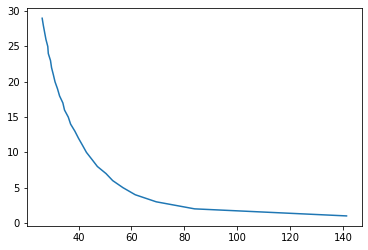

In [10]:
plt.plot(lista,range(1,30))

In [ ]:
# Criando modelo com dois grupos

In [13]:
km = KMeans(n_clusters=2).fit(dados_normalizados)

In [14]:
df1 = df.copy()

In [15]:
df1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [18]:
pca = PCA(n_components=2)
pc = pca.fit_transform(df1.drop(['Name','Type 1','Type 2'], axis=1))
df_pc = pd.DataFrame(pc,columns=['d1','d2'])

In [19]:
df_pc['Cluster']= km.labels_

In [20]:
label = km.labels_
silhouette_score(X,label)

0.2125102353745511

In [25]:
df_pc

,d1,d2,Cluster
0,-374.269574,-81.679270,1
1,-362.085766,11.263863,1
2,-345.637704,139.577869,0
3,-332.470014,247.586873,0
4,-372.683804,-91.953080,1
...,...,...,...
795,375.495598,135.891250,0
796,388.198220,245.786039,0
797,376.274732,137.080278,0
798,386.836893,224.667019,0


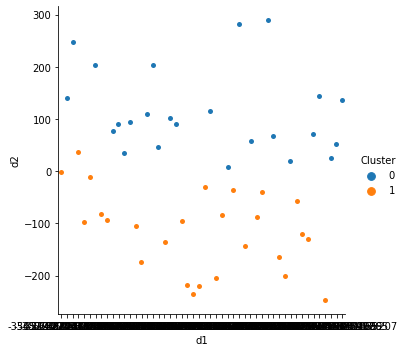

In [27]:
sns.catplot(x='d1', y='d2', hue='Cluster', data= df_pc.sample(50))